In [78]:

library(tidyverse) # metapackage of all tidyverse packages

list.files(path = "../input")


[1] "top-100-richest-people-in-the-world"

**I will be practicing cleaning data, manipulating data, as well as making a chart using R. Feel free to leave comments on what you think I can improve on. Feedback is always appreciated. First, lets import the data.**

In [79]:
top100 <- read.csv("../input/top-100-richest-people-in-the-world/top_100_richest.csv")
numberof <- read.csv("../input/top-100-richest-people-in-the-world/wiki_number_of_billionaires.csv")

**Lets take a look at some of the data**

In [80]:
head(top100)

,rank,name,net_worth,bday,age,nationality
,<int>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,Elon Musk,$240 Billion,28-Jun-71,51,South Africa
2,2,Jeff Bezos,$150 Billion,12-Jan-64,58,United States of America
3,3,Gautam Adani,$138 Billion,24-Jun-62,60,India
4,4,Bernard Arnault,$135 Billion,5-Mar-49,73,France
5,5,Bill Gates,$118 Billion,28-Oct-55,66,United States of America
6,6,Warren Buffett,$101 Billion,30-Aug-30,92,United States of America


In [81]:
head(numberof)

,country,num_billionares,billionaire_per_million
,<chr>,<chr>,<dbl>
1,World,"2,668",0.350
2,United States,735,1.853
3,Mainland China,539,0.276
4,India,166,0.101
5,Germany,134,1.553
6,Russia,83,0.677


**lets look for any null values.**

In [82]:
top100[is.na(top100$age),]

,rank,name,net_worth,bday,age,nationality
,<int>,<chr>,<chr>,<chr>,<int>,<chr>
11,11,Alain & Gerard Wertheimer,$90 Billion,,NA,France
21,21,Zhong Shanshan,$68 Billion,,NA,China
57,57,Joseph Safra,$25 Billion,1-Sep-38,NA,Brazil
81,81,Pallonji Mistry,$19 Billion,1-Jun-29,NA,India
88,88,David & Simon Reuben,$18 Billion,,NA,United Kingdom


In [83]:
which(is.na(top100))

[1] 411 421 457 481 488

**looks like only the 5 values in age are null. upon further inspection and a quick internet seach I found Joseph Safra and Palonji Mistry to be deceased. I removed them from the data frame.**

In [84]:
top100 <- top100[-c(57,81),]


In [85]:
top100[is.na(top100$age),]

,rank,name,net_worth,bday,age,nationality
,<int>,<chr>,<chr>,<chr>,<int>,<chr>
11,11,Alain & Gerard Wertheimer,$90 Billion,,NA,France
21,21,Zhong Shanshan,$68 Billion,,NA,China
88,88,David & Simon Reuben,$18 Billion,,NA,United Kingdom


**Only 3 nulls left. doing a quick search to find out age.**

In [86]:
top100two <- top100

In [87]:
top100two %>% mutate(age = replace(age, name =="Zhong Shanshan", 68),
                    age = replace(age, name =="Alain & Gerard Wertheimer", 71),
                    age = replace(age, name =="David & Simon Reuben", 78))

,rank,name,net_worth,bday,age,nationality
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,1,Elon Musk,$240 Billion,28-Jun-71,51,South Africa
2,2,Jeff Bezos,$150 Billion,12-Jan-64,58,United States of America
3,3,Gautam Adani,$138 Billion,24-Jun-62,60,India
4,4,Bernard Arnault,$135 Billion,5-Mar-49,73,France
5,5,Bill Gates,$118 Billion,28-Oct-55,66,United States of America
6,6,Warren Buffett,$101 Billion,30-Aug-30,92,United States of America
7,7,Larry Page,$100 Billion,26-Mar-73,49,United States of America
8,8,Sergey Brin,$96 Billion,21-Aug-73,48,United States of America
9,9,Steve Ballmer,$94 Billion,24-Mar-56,66,United States of America


****na has been filled with age ****

In [88]:
top100three <- top100two

**I think i should drop the bday column since that wont be used in my analysis.**

In [89]:
top100drop = select(top100three, -bday)

In [90]:
head(top100drop)

,rank,name,net_worth,age,nationality
,<int>,<chr>,<chr>,<int>,<chr>
1,1,Elon Musk,$240 Billion,51,South Africa
2,2,Jeff Bezos,$150 Billion,58,United States of America
3,3,Gautam Adani,$138 Billion,60,India
4,4,Bernard Arnault,$135 Billion,73,France
5,5,Bill Gates,$118 Billion,66,United States of America
6,6,Warren Buffett,$101 Billion,92,United States of America


**time to subset the top 7**

In [91]:
top7 <- subset(top100drop, rank <= 7, select = c(rank, name, net_worth, age, nationality))

In [92]:
View(top7)

,rank,name,net_worth,age,nationality
,<int>,<chr>,<chr>,<int>,<chr>
1,1,Elon Musk,$240 Billion,51,South Africa
2,2,Jeff Bezos,$150 Billion,58,United States of America
3,3,Gautam Adani,$138 Billion,60,India
4,4,Bernard Arnault,$135 Billion,73,France
5,5,Bill Gates,$118 Billion,66,United States of America
6,6,Warren Buffett,$101 Billion,92,United States of America
7,7,Larry Page,$100 Billion,49,United States of America


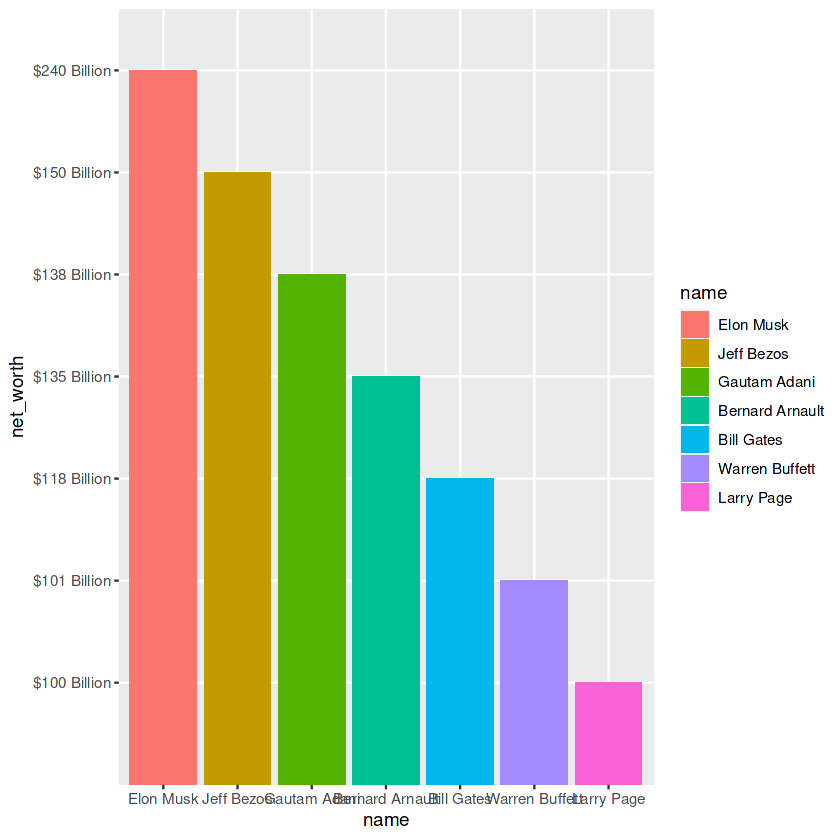

In [93]:
top7$name <- factor(top7$name,
                   levels = top7$name[order(top7$rank)])
ggplot(top7, aes(name, net_worth, fill = name)) + geom_bar(stat = "identity")

****Cleaning data and creating my first chart using ggplot with R! Of course I can widen the chart to allow room for the names to be presented better but my next notebook will be more in depth. ****